#Supervised learning cheat sheet

This notebook contains a comparision of several commonly-used supervised learning algorithms. It should be useful as a quick reference or for people currently studying for machine learning interviews.

Other related resources:
+ http://www.dataschool.io/comparing-supervised-learning-algorithms/
+ https://github.com/soulmachine/machine-learning-cheat-sheet (more like cheat 100 sheets)
+ http://webdocs.cs.ualberta.ca/~greiner/C-466/SLIDES/3b-Regression.pdf
+ http://scott.fortmann-roe.com/docs/BiasVariance.html


In [7]:
#import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import sklearn.datasets
%pylab inline

#sklearn sample generator doing lots of this
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
"""
Build some datasets that I'll demo the models on
"""
Xs = []
ys = []

#low noise, plenty of samples, should be easy
X0, y0 = sklearn.datasets.make_moons(n_samples=1000, noise=.05)
Xs.append(X0)
ys.append(y0)

#more noise, plenty of samples
X1, y1 = sklearn.datasets.make_moons(n_samples=1000, noise=.3)
Xs.append(X1)
ys.append(y1)

#less noise, few samples
X2, y2 = sklearn.datasets.make_moons(n_samples=200, noise=.05)
Xs.append(X2)
ys.append(y2)

#more noise, less samples, should be hard
X3, y3 = sklearn.datasets.make_moons(n_samples=200, noise=.3)
Xs.append(X3)
ys.append(y3)

In [3]:
def plotter(model, X, y, ax, npts=10000):
    """
    Simple way to get a visualization of the decision boundary 
    by applying the model to randomly-chosen points
    could alternately use sklearn's "decision_function"
    """
    dfX = pd.DataFrame(X,columns=['x0','x1'])
    dfy = pd.DataFrame(y,columns=['y'])
    train_df = pd.concat([dfX,dfy],axis=1)
    xs = []
    ys = []
    cs = []
    for _ in range(npts):
        x0spr = train_df['x0'].max()-train_df['x0'].min()
        x1spr = train_df['x1'].max()-train_df['x1'].min()
        x = np.random.rand()*x0spr + train_df['x0'].min()
        y = np.random.rand()*x1spr + train_df['x1'].min()
        xs.append(x)
        ys.append(y)
        cs.append(model.predict([x,y]))
    ax.scatter(xs,ys,c=cs, alpha=.35)
    ax.hold(True)
    ax.scatter(train_df['x0'],train_df['x1'],
                c=train_df['y'].map(lambda x:'r' if x else 'lime'), 
                linewidth=0,s=25,alpha=1)
    ax.set_xlim([train_df['x0'].min(), train_df['x0'].max()])
    ax.set_ylim([train_df['x1'].min(), train_df['x1'].max()])
    return

##Logistic Regression

Logistic regression is the canoncial example of a "discriminative" classifier (i.e. one that learns the mapping $f:X \rightarrow Y$ directly from the signal as opposed from learning a model of how the data was generated). Here, $Y$ is categorical and $X$ may be either continuous or categorical.

Logistic regression assumes that $f$ is a sigmoid function of an inner product with the features, eg.

$$
P(Y=1 | X;m \theta) = \sigma(\theta ^T X) = \frac{1}{1+exp(\theta ^T X)}
$$

Training a logistic regression classifier amounts to learning the parameters, $\theta$. The most simple approach is via maximum liklihood estimation. This leads to the convex unconstrained optimization:

$$
argmin_\theta = -\sum_{i=1}^M -log(P(Y_i | X_i; \theta)
$$

The MLE approach may suffer from overfitting. It is possible to reduce the effect of overfitting by introducing a user-defined parameter, $\beta$, and introducing a regularization term. To accomplish this one often assumes a Laplacian prior ( $P(\theta) = (\beta/2)^N exp(-\beta/|\theta|_1)$ ) and then does a MAP estimate[5]:

$$
argmin_\theta = -\sum_{i=1}^M -log(P(Y_i | X_i; \theta) + \beta |\theta|_{1 \text{ or } 2}
$$

Regularizing with $L_1$ favors a sparser $\theta$ (i.e. a simpler model) at the expense of a more difficult optimization problem.


###Pros:
+ Liblinear is usually available [1]
+ Few user-defined parameters to experiment with, $\beta$ is intuitive
+ Fast to train (unless $L_1$ regularized)
+ Fast to apply
+ You probably won't get fired for suggesting it
+ No assumptions about P(X|Y) during the learning stage (true of any discriminative method)
+ Logistic Regression is available in Spark [6]


###Cons:
+ Often outperformed by fancier methods
+ Interpreting $\theta$ isn't straightforward
+ Sometimes people prefer generative models
+ $L_1$ optimization is not easy
+ Bizarre use of the word "regression"




[1] http://www.csie.ntu.edu.tw/~cjlin/papers/liblinear.pdf

[2] https://www.cs.cmu.edu/~tom/mlbook/NBayesLogReg.pdf

[3] https://cs.stanford.edu/people/ang//papers/nips01-discriminativegenerative.pdf

[4] http://stackoverflow.com/questions/879432/what-is-the-difference-between-a-generative-and-discriminative-algorithm

[5] https://cs.stanford.edu/people/ang//papers/aaai06-efficientL1logisticregression.pdf

[6] https://spark.apache.org/docs/1.1.0/mllib-linear-methods.html

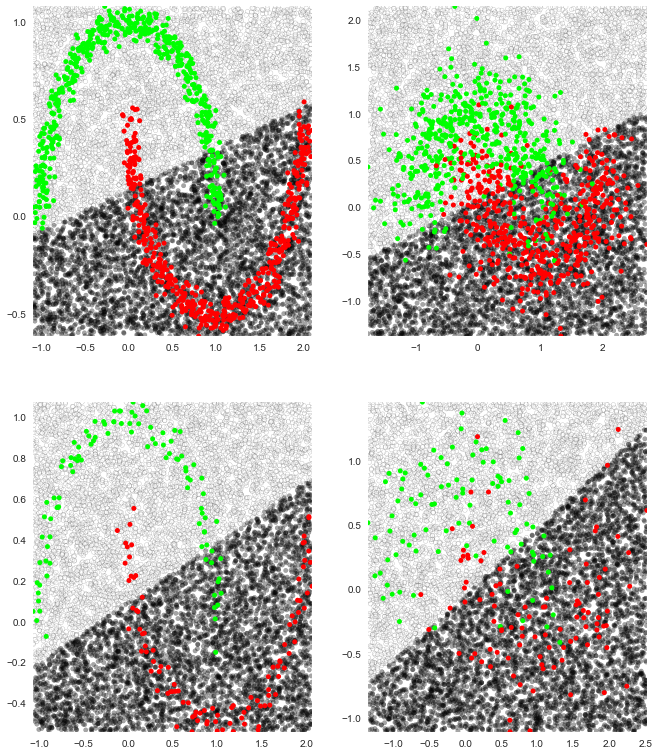

In [4]:
import sklearn.linear_model
classifier = sklearn.linear_model.LogisticRegression()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11,13))
i=0
for X,y in zip(Xs,ys): 
    classifier.fit(X,y)
    plotter(classifier,X,y,ax=axes[i//2,i%2])
    i += 1
plt.show()

##Decision trees

Decision trees perform well on categorical data and require no classifier (i.e. one that learns the mapping $f:X \rightarrow Y$ directly from the signal as opposed from learning a model of how the data was generated). Here, $Y$ is categorical and $X$ may be either continuous or categorical.

###Pros:
+ Simple to understand and to interpret. Trees can be visualised.
+ Requires little data preparation (e.g. no data normalisation)
+ Able to handle both numerical and categorical data.
+ Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.

###Cons:
+ **Overfitting**
+ Unstable - small variations in the data may lead to large variations in the tree
+ Finding the optimal decision tree is NP-hard, so heuristics are always used
+ Unbalanced data leads to biased trees

http://scikit-learn.org/stable/modules/tree.html#tree

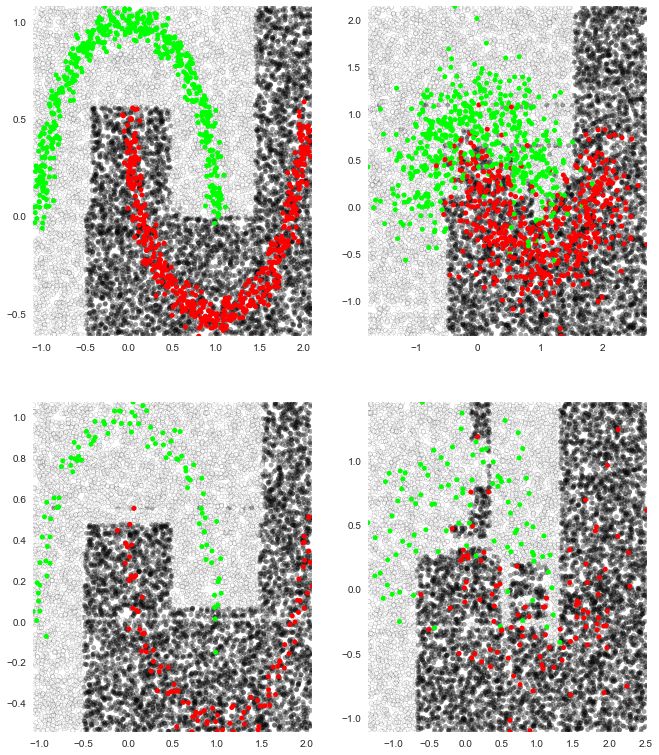

In [5]:
import sklearn.tree
classifier = sklearn.tree.DecisionTreeClassifier()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11,13))
i=0
for X,y in zip(Xs,ys): 
    classifier.fit(X,y)
    plotter(classifier,X,y,ax=axes[i//2,i%2])
    i += 1
plt.show()

## Support Vector Machines

Support vector machines learn a "maximal seperating hyperplane" between two sets of points.


Some authors have found that the $L_1$ term makes the method less stable 

http://nlp.stanford.edu/pubs/sidaw12_simple_sentiment.pdf


In [ ]:
import sklearn.svm
classifier = sklearn.svm.SVC()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11,13))
i=0
for X,y in zip(Xs,ys): 
    classifier.fit(X,y)
    plotter(classifier,X,y,ax=axes[i//2,i%2])
    i += 1
plt.show()

##Nearest Neighbors

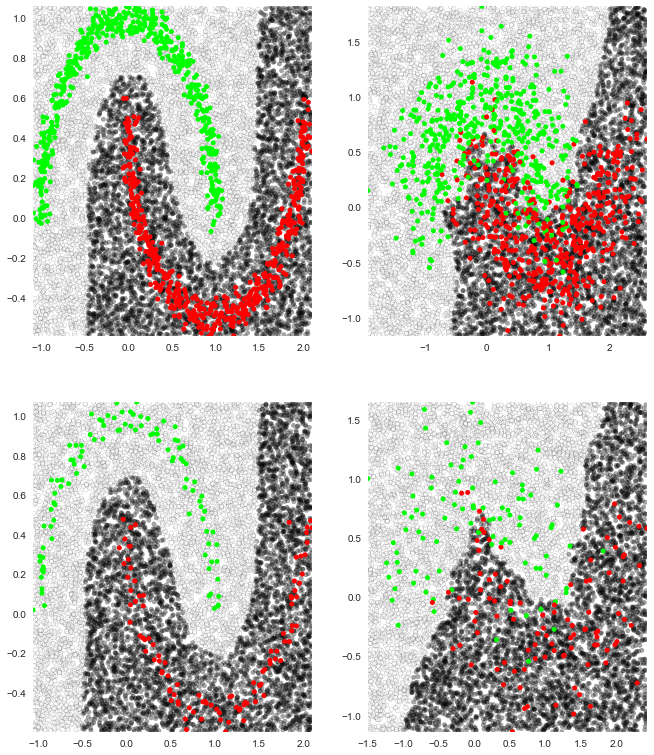

In [156]:
import sklearn.neighbors
classifier = sklearn.neighbors.KNeighborsClassifier()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11,13))
i=0
for X,y in zip(Xs,ys): 
    classifier.fit(X,y)
    plotter(classifier,X,y,ax=axes[i//2,i%2])
    i += 1
plt.show()

## Naive Bayes

Gaussian Naive Bayes reduces to Logistic Regression with an l2 regularization. 

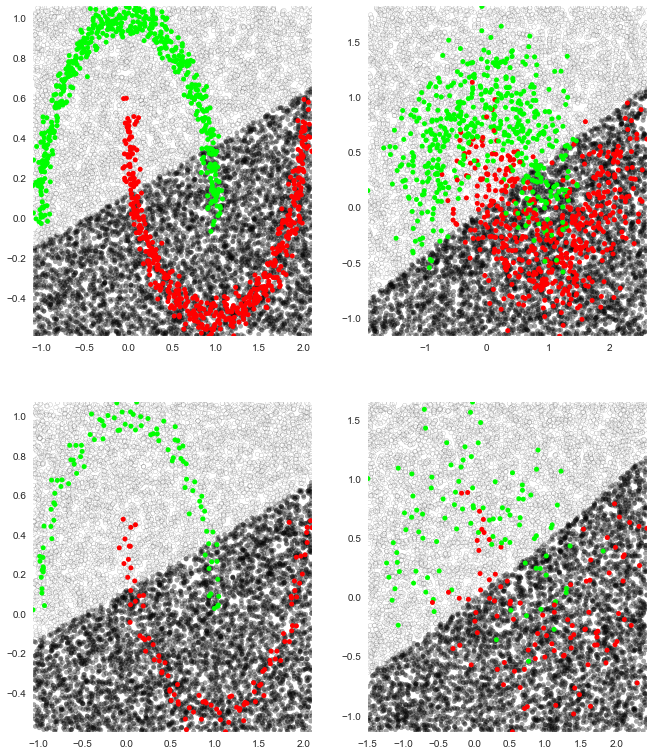

In [160]:
import sklearn.naive_bayes
classifier = sklearn.naive_bayes.GaussianNB()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11,13))
i=0
for X,y in zip(Xs,ys): 
    classifier.fit(X,y)
    plotter(classifier,X,y,ax=axes[i//2,i%2])
    i += 1
plt.show()

/home/aahu/.local/lib/python3.4/site-packages/sklearn/datasets/samples_generator.py:612: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = np.hstack([np.zeros(n_samples_in, dtype=np.intp),


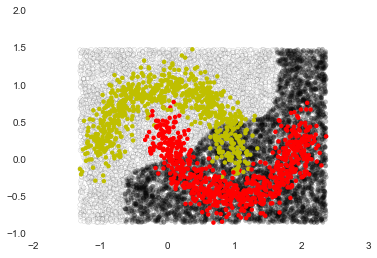

In [3]:
import sklearn.tree
import sklearn.lda
import sklearn.naive_bayes
import sklearn.neighbors

import sklearn.datasets
X, y = sklearn.datasets.make_moons(n_samples=1500, noise=.15, random_state=None)


#curvy
#classifier = sklearn.svm.SVC()

#looks overfit
#classifier = sklearn.tree.DecisionTreeClassifier()

#lda is linear, straigt line
#classifier = sklearn.lda.LDA(n_components=2)

#bayes - straight
#classifier = sklearn.naive_bayes.GaussianNB()

#k nearest neigh
classifier = sklearn.neighbors.RadiusNeighborsClassifier()

classifier.fit(X,y)

dfX = pd.DataFrame(X,columns=['x0','x1'])
dfy = pd.DataFrame(y,columns=['y'])
df = pd.concat([dfX,dfy],axis=1)
plotter(classifier,df,npts=10000)
